In [9]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:

# LOAD DATA
with open('learning_model_results.json', 'r') as f:
    data = json.load(f)

In [19]:
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

In [20]:
model_averages = []

In [23]:
for model_name, metrics in data.items():
    # Initialize accumulators for each metric
    total_accuracy = 0
    total_sensitivity = 0
    total_specificity = 0
    total_time = 0
    count = 0  # To keep track of the number of labels

    # Iterate through each label (e.g., 'No Finding', 'Cardiomegaly', etc.)
    for label, stats in metrics.items():
        # Handling lists of lists for metrics, flatten the lists first
        accuracy_values = flatten(stats.get('accuracy', [[0]]))
        sensitivity_values = flatten(stats.get('sensitivity', [[0]]))
        specificity_values = flatten(stats.get('specificity', [[0]]))
        time_values = stats.get('time', [0])  # Time values seem to be already flat

        # Calculate the averages for each label
        avg_accuracy_label = sum(accuracy_values) / len(accuracy_values) if accuracy_values else 0
        avg_sensitivity_label = sum(sensitivity_values) / len(sensitivity_values) if sensitivity_values else 0
        avg_specificity_label = sum(specificity_values) / len(specificity_values) if specificity_values else 0
        avg_time_label = sum(time_values) / len(time_values) if time_values else 0

        # Add to the totals
        total_accuracy += avg_accuracy_label
        total_sensitivity += avg_sensitivity_label
        total_specificity += avg_specificity_label
        total_time += avg_time_label

        count += 1

    # Compute the average metrics across all labels for this model
    if count > 0:
        avg_accuracy = total_accuracy / count
        avg_sensitivity = total_sensitivity / count
        avg_specificity = total_specificity / count
        avg_time = total_time / count

        # Append the averages to the list
        model_averages.append({
            'model': model_name,
            'accuracy': avg_accuracy,
            'sensitivity': avg_sensitivity,
            'specificity': avg_specificity,
            'time': avg_time
        })

# Convert the list into a pandas DataFrame
df = pd.DataFrame(model_averages)

# Create separate box plots for each metric
metrics = ['accuracy', 'sensitivity', 'specificity', 'time']


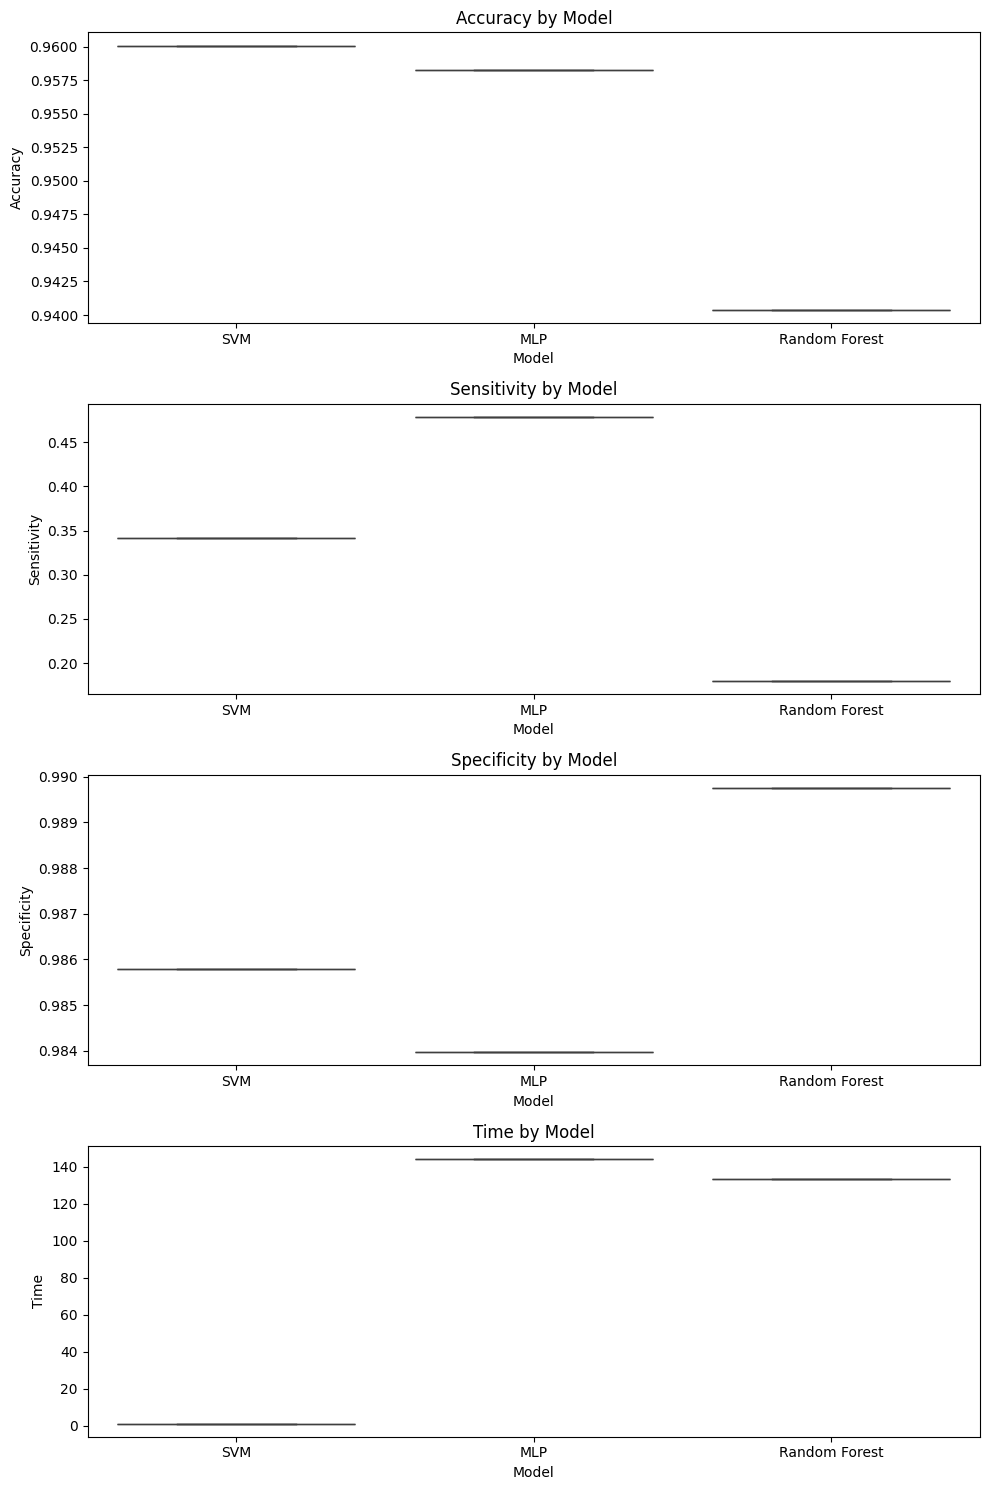

In [24]:

# Set up the figure with subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), figsize=(10, 15))

# Generate a box plot for each metric on a separate axis
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x='model', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Model')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel('Model')

# Adjust the layout
plt.tight_layout()
plt.show()

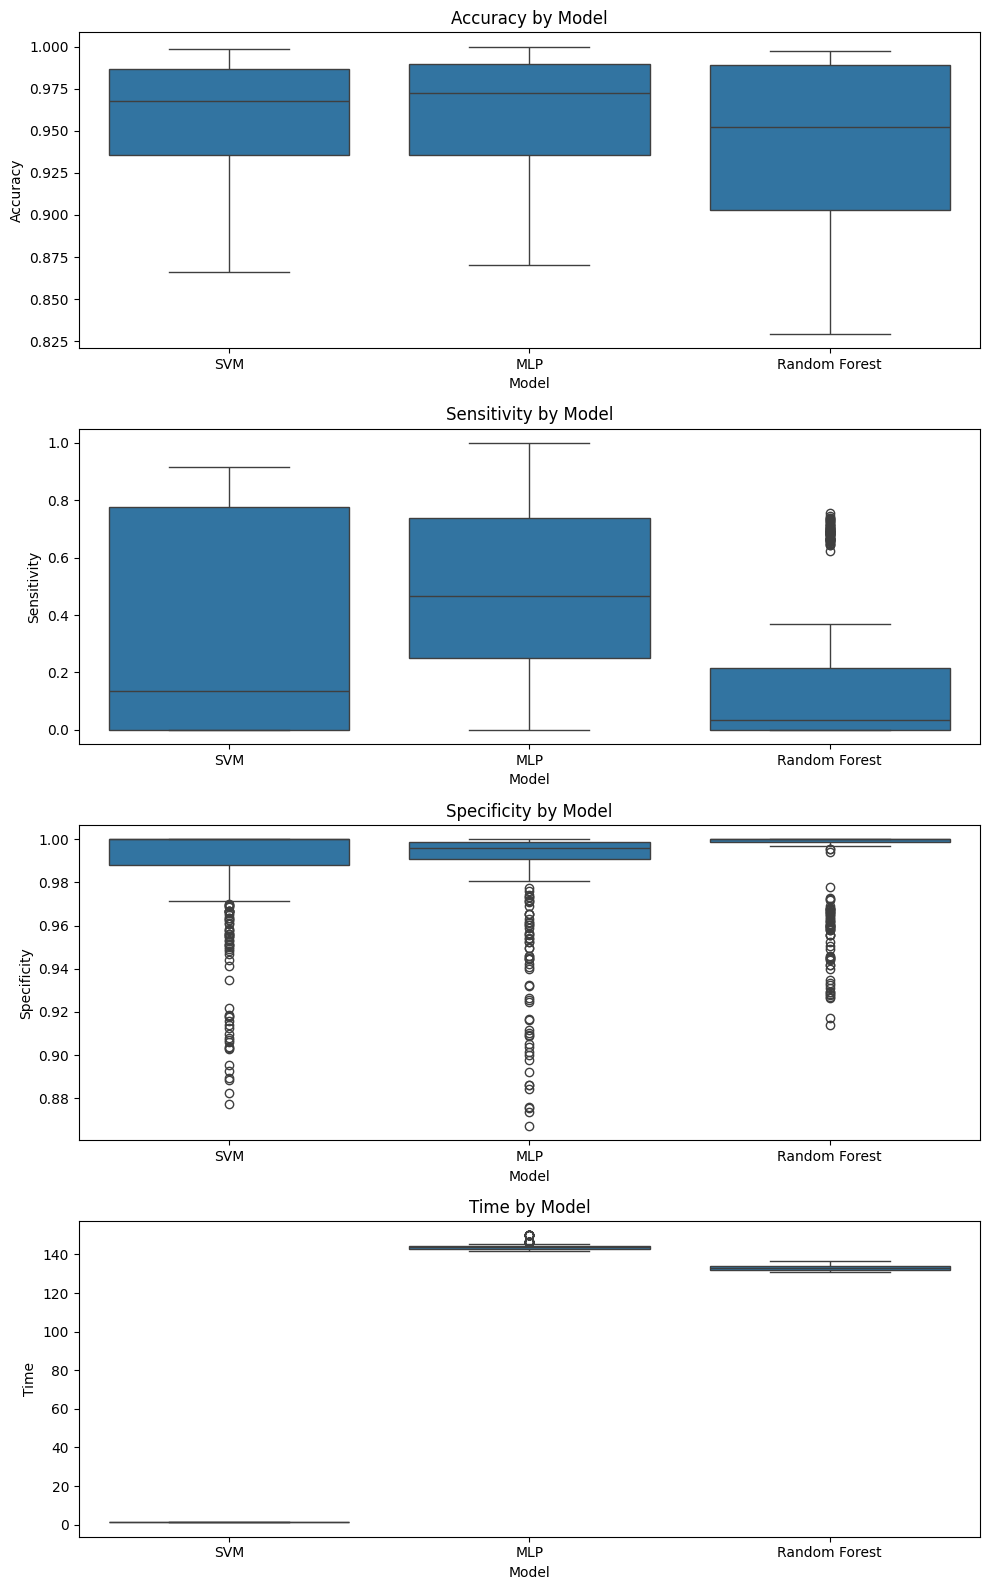

In [25]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the JSON file with performance details
with open('learning_model_results.json', 'r') as f:
    data = json.load(f)

# Helper function to flatten a list of lists
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

# Initialize a list to store the average performance values for each model
model_averages = []

# Iterate through each model in the JSON data
for model_name, metrics in data.items():
    # Initialize accumulators for each metric
    total_accuracy = []
    total_sensitivity = []
    total_specificity = []
    total_time = []
    
    # Iterate through each label (e.g., 'No Finding', 'Cardiomegaly', etc.)
    for label, stats in metrics.items():
        # Handling lists of lists for metrics, flatten the lists first
        accuracy_values = flatten(stats.get('accuracy', [[0]]))
        sensitivity_values = flatten(stats.get('sensitivity', [[0]]))
        specificity_values = flatten(stats.get('specificity', [[0]]))
        time_values = stats.get('time', [0])  # Time values seem to be already flat

        # Extend the total lists with values for each label
        total_accuracy.extend(accuracy_values)
        total_sensitivity.extend(sensitivity_values)
        total_specificity.extend(specificity_values)
        total_time.extend(time_values)

    # Store the collected values for this model
    model_averages.append({
        'model': model_name,
        'accuracy': total_accuracy,
        'sensitivity': total_sensitivity,
        'specificity': total_specificity,
        'time': total_time
    })

# Prepare a DataFrame for each metric for Seaborn visualization
metrics_to_plot = ['accuracy', 'sensitivity', 'specificity', 'time']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics_to_plot), figsize=(10, 16))

# Plotting each metric
for i, metric in enumerate(metrics_to_plot):
    plot_data = []
    model_labels = []

    # Collect data for each model for the current metric
    for model_data in model_averages:
        plot_data.extend(model_data[metric])
        model_labels.extend([model_data['model']] * len(model_data[metric]))

    # Create a box plot for the current metric
    sns.boxplot(x=model_labels, y=plot_data, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Model')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric.capitalize())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
